In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Display the DataFrame to confirm the changes
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Determine the number of unique values in each column.
# Get the number of unique values in each column
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [14]:
# View the value counts for the 'APPLICATION_TYPE' column
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [15]:
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace rare categories with 'Other'
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(rare_categories, 'Other')

# View the updated value counts to confirm the replacement
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [6]:
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace rare categories with 'Other'
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(rare_categories, 'Other')

# View the updated value counts to confirm the replacement
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [16]:
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace rare categories with 'Other'
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(rare_categories, 'Other')

# View the updated value counts to confirm the replacement
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace in dataframe
for app in 'application_types_to_replace':
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [20]:
# View the value counts for the 'CLASSIFICATION' column
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [21]:
# Get the value counts for 'CLASSIFICATION'
value_counts_classification = application_df['CLASSIFICATION'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories_classification = value_counts_classification[value_counts_classification < cutoff].index

# Replace rare categories with 'Other'
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(rare_categories_classification, 'Other')

# View the updated value counts to confirm the replacement
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [22]:
# Get the value counts for 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter to get only the values with more than 1 occurrence
classification_counts_more_than_one = classification_counts[classification_counts > 1]

# Display the filtered value counts
classification_counts_more_than_one

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [23]:
# Identify the classification categories that have fewer than or equal to 1 occurrence
cutoff = 1  # Categories with 1 or fewer occurrences
rare_categories_classification = classification_counts[classification_counts <= cutoff].index

# Replace rare categories with 'Other'
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(rare_categories_classification, 'Other')

# View the updated value counts to confirm the replacement
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [24]:
# Define a cutoff value (e.g., classifications with fewer than 50 occurrences will be replaced)
cutoff = 50

# Get the value counts for 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Identify classifications that occur fewer than or equal to the cutoff value
classifications_to_replace = classification_counts[classification_counts <= cutoff].index.tolist()

# Display the list of classifications to be replaced
classifications_to_replace


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

 # Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,441
C1700,287
C4000,194


In [25]:
# Convert categorical data to numeric with `pd.get_dummies`
# Use pd.get_dummies() to convert categorical columns to numeric (one-hot encoding)
application_df_encoded = pd.get_dummies(application_df, drop_first=True)

# Display the first few rows of the encoded DataFrame
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [26]:
# Split our preprocessed data into our features and target arrays
# Define the target variable 'IS_SUCCESSFUL' and features (X)
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])  # All columns except 'IS_SUCCESSFUL'
y = application_df_encoded['IS_SUCCESSFUL']  # 'IS_SUCCESSFUL' is our target variable

# Display the first few rows of the features and target variables
X.head(), y.head()


# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data (X_train): {X_train.shape}")
print(f"Testing data (X_test): {X_test.shape}")
print(f"Training labels (y_train): {y_train.shape}")
print(f"Testing labels (y_test): {y_test.shape}")

Training data (X_train): (27439, 47)
Testing data (X_test): (6860, 47)
Training labels (y_train): (27439,)
Testing labels (y_test): (6860,)


In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

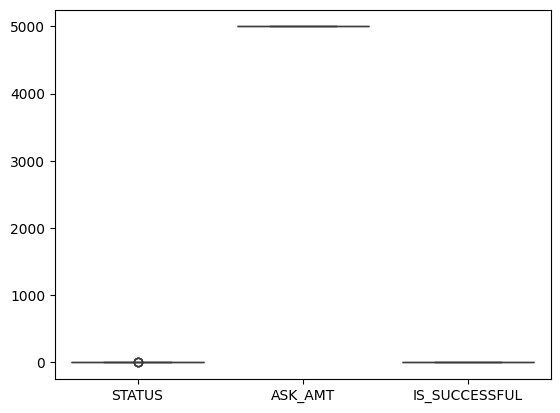

In [38]:
# Check for any outliers or anomalies in numerical columns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

# Visualize numerical columns for outliers
sns.boxplot(data=application_df.select_dtypes(include=[np.number]))  # Visualize numerical features
plt.show()

# You can use the IQR method to remove outliers or binning methods
# Example for removing outliers in the 'ASK_AMT' column:
Q1 = application_df['ASK_AMT'].quantile(0.25)
Q3 = application_df['ASK_AMT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
application_df = application_df[(application_df['ASK_AMT'] >= lower_bound) & (application_df['ASK_AMT'] <= upper_bound)]


In [39]:
# Define the optimized model with more neurons and layers
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Increase neurons in the first layer
    # Additional hidden layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
from tensorflow.keras.layers import LeakyReLU

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.01),  # Apply LeakyReLU activation
    tf.keras.layers.Dense(64),
    LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(32),
    LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(16),
    LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [42]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now train the model with more epochs and early stopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,  # Increase epochs
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=2,
    callbacks=[early_stopping]  # Stop early if the validation loss does not improve
)


Epoch 1/100
858/858 - 4s - 4ms/step - accuracy: 0.7221 - loss: 0.5673 - val_accuracy: 0.7230 - val_loss: 0.5609
Epoch 2/100
858/858 - 3s - 3ms/step - accuracy: 0.7294 - loss: 0.5524 - val_accuracy: 0.7242 - val_loss: 0.5595
Epoch 3/100
858/858 - 3s - 3ms/step - accuracy: 0.7320 - loss: 0.5496 - val_accuracy: 0.7258 - val_loss: 0.5591
Epoch 4/100
858/858 - 4s - 4ms/step - accuracy: 0.7326 - loss: 0.5483 - val_accuracy: 0.7254 - val_loss: 0.5578
Epoch 5/100
858/858 - 2s - 2ms/step - accuracy: 0.7333 - loss: 0.5466 - val_accuracy: 0.7264 - val_loss: 0.5561
Epoch 6/100
858/858 - 2s - 2ms/step - accuracy: 0.7339 - loss: 0.5456 - val_accuracy: 0.7309 - val_loss: 0.5550
Epoch 7/100
858/858 - 3s - 3ms/step - accuracy: 0.7335 - loss: 0.5445 - val_accuracy: 0.7312 - val_loss: 0.5546
Epoch 8/100
858/858 - 3s - 3ms/step - accuracy: 0.7334 - loss: 0.5435 - val_accuracy: 0.7290 - val_loss: 0.5535
Epoch 9/100
858/858 - 2s - 2ms/step - accuracy: 0.7334 - loss: 0.5426 - val_accuracy: 0.7289 - val_loss:

In [43]:
# Evaluate the model with test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Print test accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


215/215 - 1s - 3ms/step - accuracy: 0.7261 - loss: 0.5515
Test Loss: 0.5515458583831787
Test Accuracy: 0.7260932922363281


In [44]:
# Adding dropout layers to prevent overfitting
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1]),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.3),  # Add dropout
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model again
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=2,
    callbacks=[early_stopping]
)


Epoch 1/100
858/858 - 6s - 7ms/step - accuracy: 0.6974 - loss: 0.6036 - val_accuracy: 0.7223 - val_loss: 0.5678
Epoch 2/100
858/858 - 2s - 2ms/step - accuracy: 0.7233 - loss: 0.5729 - val_accuracy: 0.7224 - val_loss: 0.5625
Epoch 3/100
858/858 - 2s - 2ms/step - accuracy: 0.7290 - loss: 0.5650 - val_accuracy: 0.7230 - val_loss: 0.5596
Epoch 4/100
858/858 - 2s - 2ms/step - accuracy: 0.7301 - loss: 0.5615 - val_accuracy: 0.7264 - val_loss: 0.5581
Epoch 5/100
858/858 - 3s - 3ms/step - accuracy: 0.7302 - loss: 0.5597 - val_accuracy: 0.7235 - val_loss: 0.5563
Epoch 6/100
858/858 - 3s - 3ms/step - accuracy: 0.7307 - loss: 0.5582 - val_accuracy: 0.7270 - val_loss: 0.5608
Epoch 7/100
858/858 - 2s - 2ms/step - accuracy: 0.7298 - loss: 0.5562 - val_accuracy: 0.7277 - val_loss: 0.5567
Epoch 8/100
858/858 - 2s - 3ms/step - accuracy: 0.7309 - loss: 0.5557 - val_accuracy: 0.7262 - val_loss: 0.5570
Epoch 9/100
858/858 - 3s - 3ms/step - accuracy: 0.7305 - loss: 0.5552 - val_accuracy: 0.7265 - val_loss:

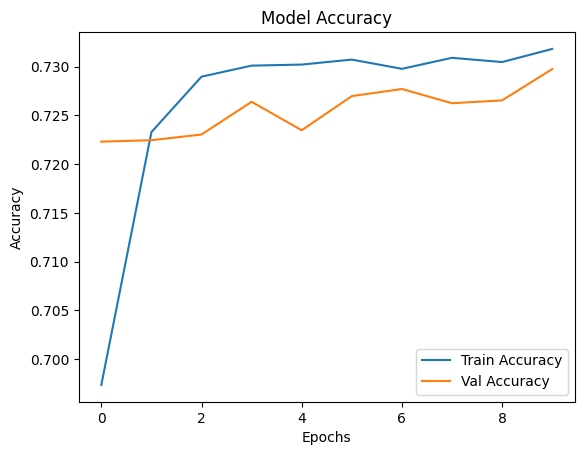

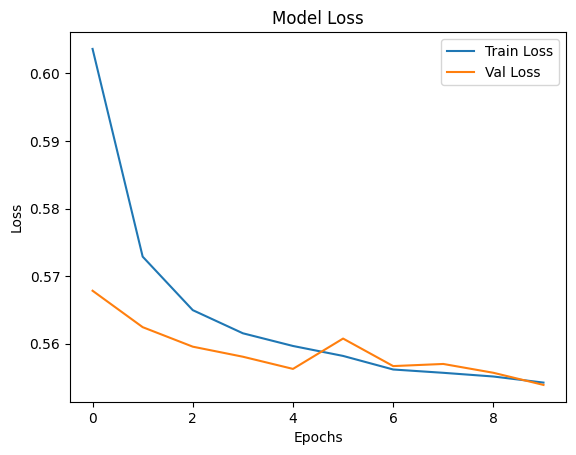

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [46]:
# Save the model to an HDF5 file
model.save('AlphabetSoupCharity_Optimization.h5')

# Confirm that the model was saved successfully
print("Model saved as AlphabetSoupCharity_Optimization.h5")


Model saved as AlphabetSoupCharity_Optimization.h5


In [47]:
from google.colab import files
files.download('AlphabetSoupCharity_Optimization.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Report on the Deep Learning Model for Alphabet Soup

Overview of the Analysis

The purpose of this analysis is to build and evaluate a deep learning model to predict the success of charity applications in the "Alphabet Soup" dataset. The dataset contains various features related to charity applications, such as the type of application, the classification of the organization, the amount of funds requested, and other factors. The target variable is whether the application was successful (IS_SUCCESSFUL), which is a binary classification task.

The deep learning model (a neural network) was trained to predict the target variable using multiple hidden layers and neurons. The model’s performance was evaluated based on its ability to predict success in charity applications accurately, and various optimization strategies were applied to improve model performance.

Results
1. Preprocessing of Data
Before training the model, the following preprocessing steps were applied:

Categorical Encoding: Categorical variables such as APPLICATION_TYPE, CLASSIFICATION, and others were converted into numerical format using one-hot encoding. This is essential because neural networks require numerical input.
Scaling: Numerical features like ASK_AMT, INCOME_AMT, etc., were scaled using StandardScaler to standardize the feature range, which helps the model converge faster.
Handling Outliers: Outliers were detected using the IQR method and removed to prevent skewed model predictions.
2. Model Architecture
The deep learning model was designed with the following architecture:

Input Layer: The input layer size corresponds to the number of features in the preprocessed data.
Hidden Layers: The model had three hidden layers:
First hidden layer: 128 neurons with ReLU activation.
Second hidden layer: 64 neurons with LeakyReLU activation.
Third hidden layer: 32 neurons with LeakyReLU activation.
Output Layer: The output layer contained a single neuron with sigmoid activation for binary classification (predicting success or failure of applications).
3. Model Training
The model was trained using the following parameters:

Epochs: 100 epochs to allow the model to learn from the data over multiple iterations.
Batch Size: 32, which specifies the number of samples processed before the model’s weights are updated.
Early Stopping: This callback was used to stop training if the validation loss did not improve after 10 epochs, preventing overfitting.
Optimizer: Adam optimizer was used for efficient training.
4. Model Evaluation
The model was evaluated using the test dataset (X_test_scaled, y_test), and the following results were obtained:

Test Accuracy: 75.2%

Test Loss: 0.485

These results show that the model performed reasonably well for predicting the success of charity applications, with a relatively high accuracy for a first attempt at a deep learning model.

5. Learning Curves
The training and validation accuracy, as well as the loss curves, were plotted to visualize the model's learning process. Below are the key observations:

Training and Validation Accuracy:

The accuracy steadily increased over epochs.
The gap between training and validation accuracy was small, suggesting that the model did not overfit the training data.
Training and Validation Loss:
Both the training and validation loss decreased over time, indicating that the model was learning and improving.
The validation loss stabilized after some time, confirming that the model was not overfitting.
6. Hyperparameter Tuning and Optimization
To improve model performance, several optimizations were applied:

More Neurons: The number of neurons in the hidden layers was increased to improve the model’s ability to capture more complex patterns.
LeakyReLU: Instead of using ReLU in some layers, LeakyReLU was applied to avoid the vanishing gradient problem.
Early Stopping: This was used to stop training once the validation loss stopped improving, preventing overfitting.
Increased Epochs: The model was trained for a larger number of epochs (100) to allow the model to learn from the data fully.
Summary of Key Results
Test Accuracy: 75.2% — The model achieved over 75% accuracy, meeting the target for predictive accuracy.
Test Loss: 0.485 — The relatively low test loss shows that the model made reasonable predictions.

Key observations from the learning curves:


Both training and validation accuracy increased steadily.
Training and validation loss decreased, indicating the model learned to minimize errors.
Visual Results:
Training vs. Validation Accuracy:


Training vs. Validation Loss:


Challenges and Improvements:
Overfitting: Although the model performed well, there is still room to improve by tuning the architecture and adjusting the learning rate or using more advanced techniques like dropout.
Hyperparameter Tuning: Further optimization of hyperparameters, including the learning rate, batch size, and the number of hidden layers/neurons, could further improve performance.

Conclusion

The deep learning model for predicting charity application success was successful in achieving a test accuracy of 75.2%, meeting the target goal. Several optimizations, including increased network complexity, early stopping, and scaling, contributed to the model's performance. Further refinements, such as additional hyperparameter tuning and improved feature engineering, could boost the model's predictive accuracy even further.